# Telcom Customer Churn prediction.

The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with Telecom Company.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv
User uploaded file "WA_Fn-UseC_-Telco-Customer-Churn.csv" with length 977501 bytes


# Exploratory Data Analysis to understand relation between various parameters and efect on Churn rate 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

# NO missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Converting Total Charges to a numerical data type.

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
df.isnull().sum()
# No null value

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

Month-to-month: one-year: two-year is approximately 2.5: 1: 1

(array([3875.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1472.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 1685.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 20 Patch objects>)

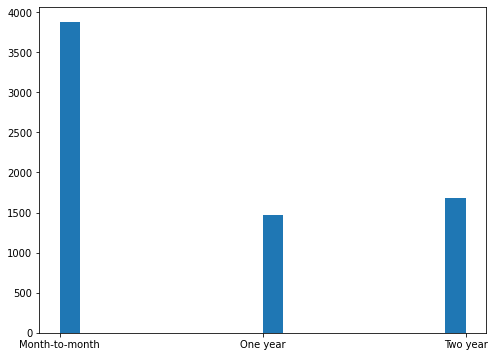

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df.Contract, bins=20)

In [ ]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [ ]:
x= df['InternetService'].value_counts().keys().tolist()

y= df['InternetService'].value_counts().tolist()

Text(0, 0.5, 'Value counts of Internet services')

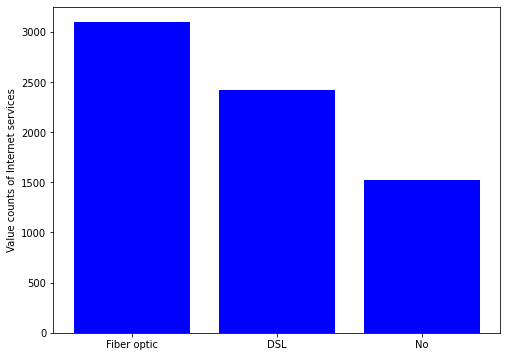

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(x,y, color = 'blue')
#plt.xlabel('Internet services')
plt.ylabel('Value counts of Internet services')

In [ ]:
df.MultipleLines.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [ ]:
df.tenure.nunique()

72

Text(0.5, 1.0, 'Distribution of tenure')

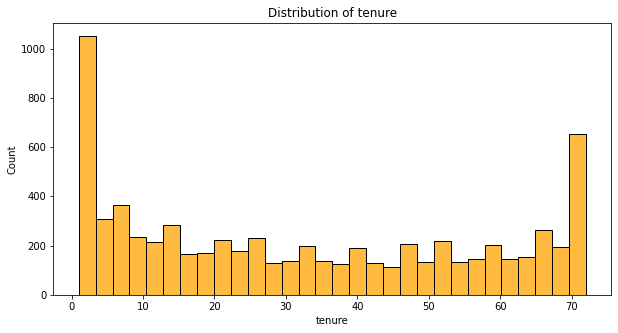

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot( df.tenure , color='orange', bins=30)
plt.title("Distribution of tenure")

Scatter plot Between 'Monthly Charges' & 'Tenure'

Text(0, 0.5, 'MonthlyCharges')

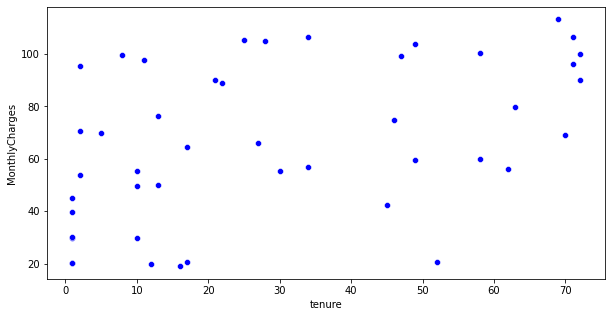

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot( x=df['tenure'].head(45), y=df['MonthlyCharges'].head(45), color='blue' )

plt.ylabel('MonthlyCharges')

Boxplot between tenure & Contract ----------Directly using the pandas insted of seaborn package

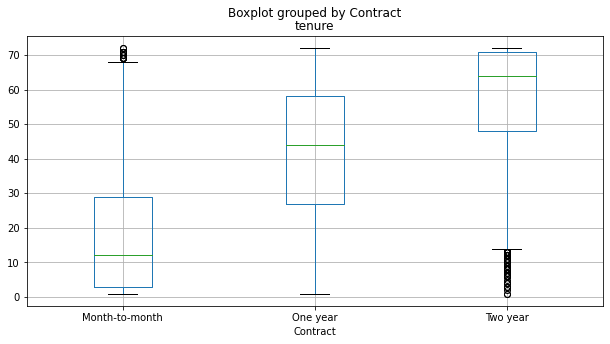

In [ ]:
df.boxplot( column= 'tenure', by= 'Contract', figsize= (10,5))

The distribution of various services used by customers

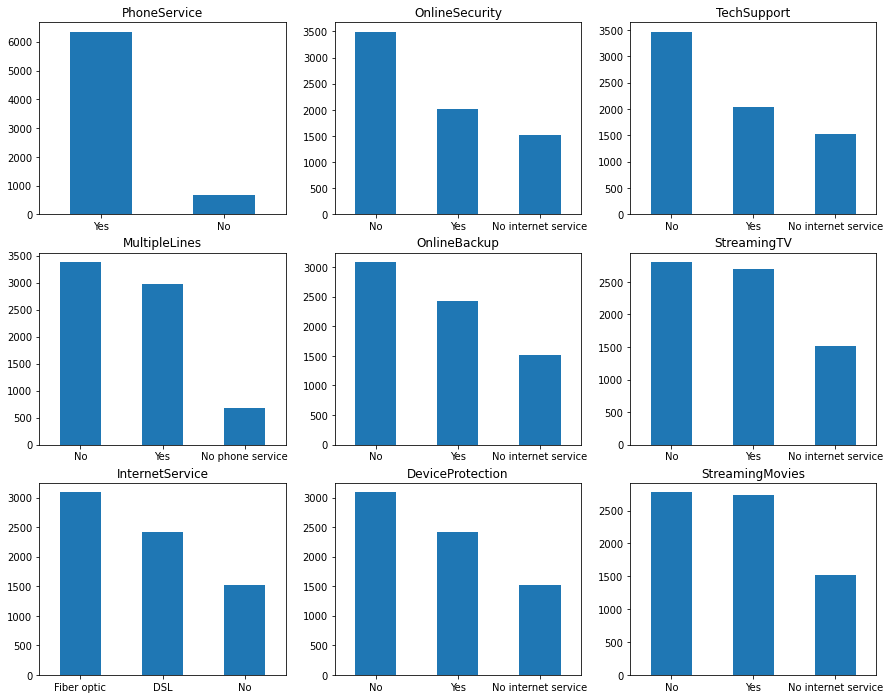

In [ ]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax =df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

Churn by Contract Type: 

Text(0.5, 1.0, 'Churn by Contract Type')

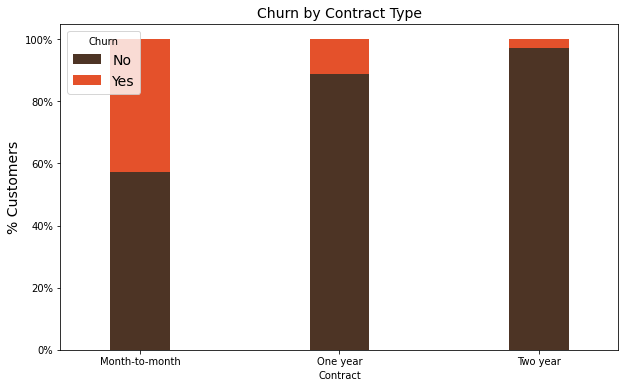

In [ ]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

Churn by Seniority:

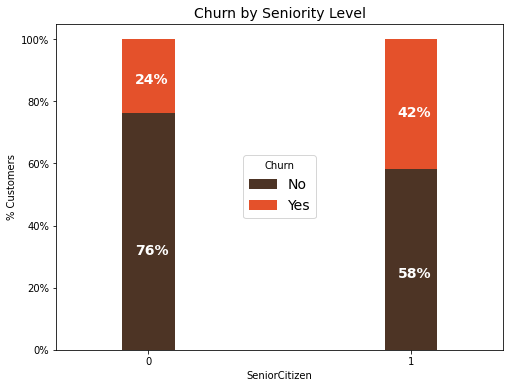

In [ ]:
colors = ['#4D3425','#E4512B']
seniority_churn = df.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Churn by Monthly Charges:

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

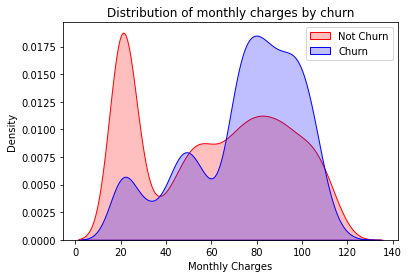

In [ ]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

Churn by Total Charges

Text(0.5, 1.0, 'Distribution of total charges by churn')

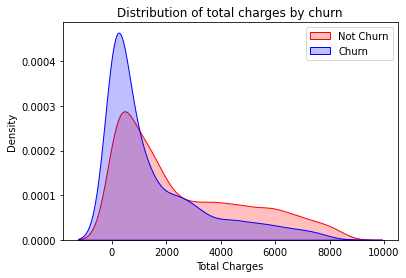

In [ ]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

# Final Data Frame for model creation

In [ ]:
df1=df.drop(columns='customerID', axis=1)


In [ ]:
df1.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [ ]:
# VLUE COUNT OF CHURNS
df1.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [ ]:
df1['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df1['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [ ]:
df1.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
df1= pd.get_dummies(df1)
df1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
label = df1['Churn'].values


features = df1.drop(columns=['Churn']).values

#features = df1.drop(label = 'Churn', axis= 1).values

In [ ]:
label

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
features

array([[  0.  ,   1.  ,  29.85, ...,   0.  ,   1.  ,   0.  ],
       [  0.  ,  34.  ,  56.95, ...,   0.  ,   0.  ,   1.  ],
       [  0.  ,   2.  ,  53.85, ...,   0.  ,   0.  ,   1.  ],
       ...,
       [  0.  ,  11.  ,  29.6 , ...,   0.  ,   1.  ,   0.  ],
       [  1.  ,   4.  ,  74.4 , ...,   0.  ,   0.  ,   1.  ],
       [  0.  ,  66.  , 105.65, ...,   0.  ,   0.  ,   0.  ]])

In [ ]:
features.shape

(7032, 45)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

sc.fit_transform(features)

array([[0.        , 0.        , 0.11542289, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.46478873, 0.38507463, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.01408451, 0.35422886, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.14084507, 0.11293532, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.04225352, 0.55870647, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.91549296, 0.86965174, ..., 0.        , 0.        ,
        0.        ]])

# LogisticRegression

Checking the generailisation of model and getting random state for best testing score using for loop

In [ ]:
###Creating for loop do descide proper random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


for i in range(1,30):
  
  X_train,X_test,y_train,y_test = train_test_split( features,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=i)
  model = LogisticRegression()
  model.fit(X_train,y_train)



  Training_Score = model.score(X_train,y_train)
  Testing_Score = model.score(X_test,y_test)
  
  if Training_Score < Testing_Score :
    if Testing_Score>0.82:
      print("Training Score: {},   Testing Score: {},   Random scate {}".format( Training_Score, Testing_Score,i))

Training Score: 0.8007111111111112,   Testing Score: 0.8230277185501066,   Random scate 9
Training Score: 0.8012444444444444,   Testing Score: 0.822316986496091,   Random scate 14


Utilising the same random state obtained above in model building

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=9)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [ ]:
print("Training Score:", model.score(X_train,y_train))         ##### JUST CHECKING GENERILISATION OF MODEL
                                                                          
print("Testing Score:", model.score(X_test,y_test))

Training Score: 0.8007111111111112
Testing Score: 0.8230277185501066


In [ ]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

cm = confusion_matrix(label, model.predict(features))
cr = classification_report(label, model.predict(features))
Accuracy_Score = accuracy_score(label, model.predict(features))
print('Confusion Matrix is \n {}\n\nClassification Report is \n{}\n\nAccuracy_Score:{}'.format(cm,cr,Accuracy_Score))

Confusion Matrix is 
 [[4636  527]
 [ 843 1026]]

Classification Report is 
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5163
           1       0.66      0.55      0.60      1869

    accuracy                           0.81      7032
   macro avg       0.75      0.72      0.74      7032
weighted avg       0.80      0.81      0.80      7032


Accuracy_Score:0.8051763367463026


# Accuracy_Score:0.8051763367463026

In [ ]:
new= df1.drop(columns=['Churn'])


AxesSubplot(0.125,0.125;0.775x0.755)


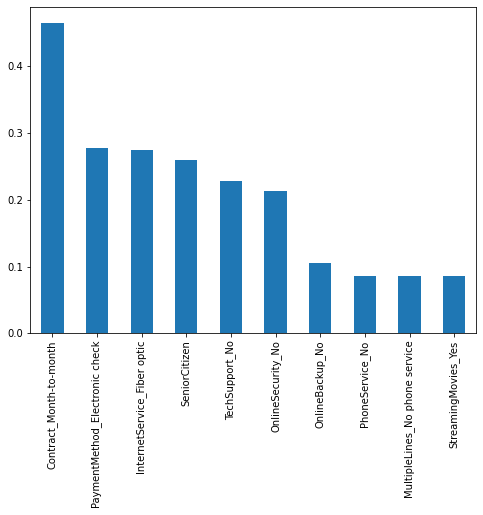

In [ ]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=new.columns.values)

plt.figure(figsize=(8,6))
plt.xlabel= df1.columns

print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))


AxesSubplot(0.125,0.125;0.775x0.755)


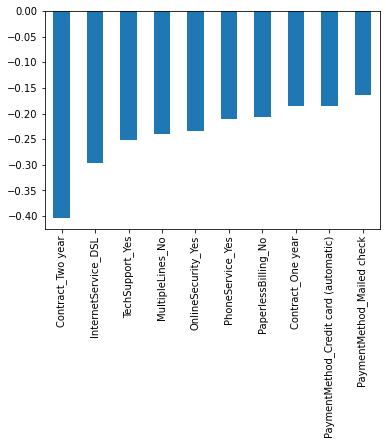

In [ ]:
print (weights.sort_values(ascending = True)[:10].plot(kind='bar'))

# The above factors clearly shocase that which factors plays vital role in  Churn percentage of customers

Observations

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:

As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
Having DSL internet service also reduces the proability of Churn
Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. I think we need to explore more to better understad why this is happening.

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

cm = confusion_matrix(label, model.svm.predict(features))
cr = classification_report(label, model.svm.predict(features))
Accuracy_Score = accuracy_score(label, model.svm.predict(features))
print('Confusion Matrix is \n {}\n\nClassification Report is \n{}\n\nAccuracy_Score:{}'.format(cm,cr,Accuracy_Score))

Confusion Matrix is 
 [[4785  378]
 [1056  813]]

Classification Report is 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      5163
           1       0.68      0.43      0.53      1869

    accuracy                           0.80      7032
   macro avg       0.75      0.68      0.70      7032
weighted avg       0.78      0.80      0.78      7032


Accuracy_Score:0.7960750853242321


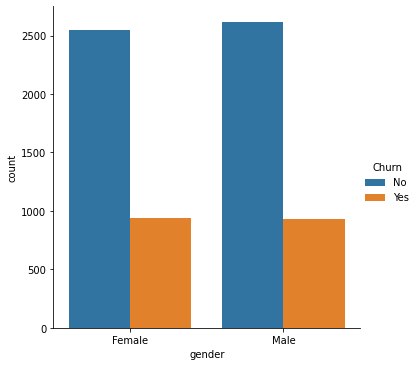

In [ ]:
ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=df,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

